In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [46]:
df.shape

(150, 6)

In [47]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [48]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [49]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

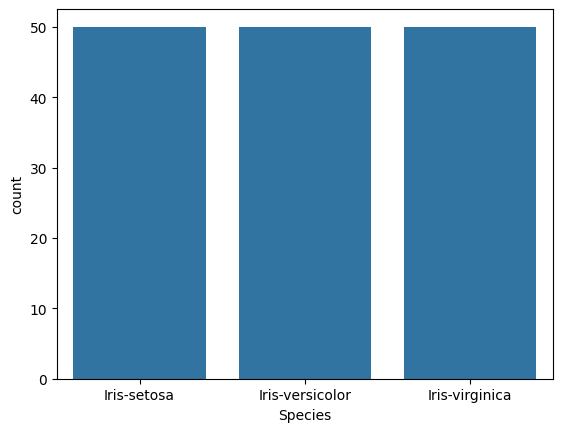

In [52]:
sns.countplot(x='Species',data=df)

In [53]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [54]:
df.drop(['Id'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
# XGBClassifier, like most machine learning algorithms, works with numeric data internally. 
# If your target variable is categorical (e.g., "Yes"/"No", "Spam"/"Not Spam", etc.), 
# it needs to be converted to numeric form before training

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])

In [57]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

In [59]:
#Converting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [60]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [61]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [62]:
y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 105, dtype: int64

In [63]:
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
61     1
92     1
112    2
2      0
141    2
43     0
10     0
Name: Species, dtype: int64

In [64]:
# #Model creation
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import 
# rf=RandomForestClassifier(random_state=0) 
# #n_estimators is the no.of subset created, default =100. here almost 75% of dataset randomforest got better result 
# #base is tree so we set maximum depth,str is gini ,set the random set because if we run it will changes.
# ab=AdaBoostClassifier(random_state=1)
# gb=GradientBoostingClassifier(random_state=0)
# xb=XGBClassifier(random_state=0)
# models=[rf,ab,xb]
# for model in models:
#     print(model)
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     print(y_pred)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
rf=RandomForestClassifier(random_state=0,n_estimators=200) 
#n_estimators is the no.of subset created, default =100. here almost 75% of dataset randomforest got better result 
#base is tree so we set maximum depth,str is gini ,set the random set because if we run it will changes.
ab=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
xb=XGBClassifier(random_state=0)
models=[rf,ab,gb,xb]
for model in models:
    print(model)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))

RandomForestClassifier(n_estimators=200, random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

AdaBoostClassifier(random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.92        18
           2       0.90      0.82      0.86        11

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45

GradientBoostingClassifier(random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

In [66]:
#performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

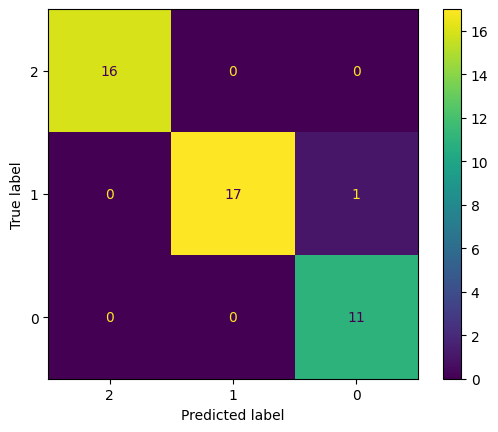

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
label=[2,1,0]
cmd=ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()
